## Guide - pyLEnM package 
# Case 1 - Basics
Welcome to the demonstration notebook where we'll go over all of the Basic functions in the **pyLEnM** package!<br>
Let’s get started!


## Installing, Importing, and Understanding the package

Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# Import our packages
import pylenm
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.10.6'

The pyLEnM package has two modules as follows: 
   <br>1. **functions:** where all of the package functionality is imported.
   <br>2. **usage:** where all of the fucntion descriptions are imported.

Let's import each of these individually from the package:

In [3]:
from pylenm import functions, usage

Let's start with the **usage** module.
The module has 2 useful functions to help you understand how to use the pyLEnM functions:<br>
   1. **get_FunctionList():** lists the functions available in the package.<br>
   2. **get_FunctionDescription():** provides a detailed description of a function(s) including the parameters.

Let's see what pyLEnM has to offer:

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_by_column
    5) filter_wells
    6) remove_outliers
    7) get_analyte_details
    8) get_data_summary
    9) get_well_analytes
    10) plot_all_time_series
    11) query_data
    12) plot_data
    13) plot_all_data
    14) plot_correlation_heatmap
    15) plot_all_correlation_heatmap
    16) interpolate_wells_by_analyte
    17) interpolate_well_data
    18) plot_corr_by_well
    19) plot_all_corr_by_well
    20) plot_corr_by_date
    21) plot_corr_by_year
    22) plot_MCL
    23) plot_PCA_by_date
    24) plot_PCA_by_year
    25) plot_PCA_by_well
    26) plot_coordinates_to_map




You can run **get_FunctionDescription()** on its own to get ALL function descriptions: ...

In [5]:
usage.get_FunctionDescription()

--------------------------------------------------------------------------------------
1) simplify_data
------------------------------------------

simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the d

... or simply specify the name (as a string) of the function you would like a description for:

In [6]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

If at any point you forget what or how to use any of the pyLEnM fucntions, refer back to the usage module! 

## Using pyLEnM

Now let's get our hands dirty and start exploring the **functions** module.

First, import our two datasets here. It's located in the same directory in a folder called `data`.<br><br>
PyLEnM takes in two datasets: <br>
1. **Concentration Data:** Dataset containing the concetration values<br>
2. **Construction Data:** Dataset containing the construction information of locations such as the Longitude and Latitude values.

In [7]:
concentration_data = pd.read_csv('data/FASB_Data_thru_3Q2015.csv')
construction_data = pd.read_excel('data/FASB Well Construction Info.xlsx')

Now that we have our data imported let's save the data into our functions class.

We do this by initializing **functions** with our data. We'll call the instance pylenm

In [8]:
# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



If the data passed doesn't meet the package requiremnts, you'll be presented with the following message.

To demonstrate the requirments we'll pass an arbitrary list instead of a dataframe.

In [9]:
functions([1,2,3,4,5])

ERROR: Make sure the data is a pandas DataFrame.

PYLENM DATA REQUIREMENTS:
The imported data needs to meet ALL of the following conditions to have a successful import:
   1) Data should be a pandas dataframe.
   2) Data must have these column names: 
      ['COLLECTION_DATE','STATION_ID','ANALYTE_NAME','RESULT','RESULT_UNITS']


We can view the concentration data we imported by running the `getData()` function.

In [10]:
pylenm.getData()

,ID,FACILITY,FFA_INDEX_NO,SRS_AREA,OPERABLE_UNIT,STATION_ID,STATION_TYPE,SEIR_ID,WELL_USE,REVISION_ID,SAMPLE_EVENT,LOG_BOOK_NO,SAMPLE_NAME,COLLECTION_DATE,QUARTER,SAMPLE_USE,ANALYTE_NAME,ANALYTICAL_METHOD,CAS_NO,FILTERED_UNFILTERED,MDL,PQL,EPA_STORET___EMS_QUALIFIERS,EPA_FUNCT_GUIDE_CODE,LAB_QUALIFICATION,DATA_QUALIFERS,RESULT,RESULT_UNITS,COUNTING_UNCERTAINTY,MATRIX_CODE,VALIDATION_STATUS,FIELD_QC_CODE,LAB_QC_CODE,LAB_CODE,ANALYTE_TYPE,DILUTION_FACTOR,SAMPLER_COMMENTS
0,214782,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB104D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q02FHRCRA,NaN,FHR-000001046,9/5/02,2002-3Q,FA;PWI,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.08,1.0,NaN,NaN,U,U,1.00,ug/L,NaN,GRWATER,VU,REG,REG,MLFY02,TRG,1.0,NaN
1,214785,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB112A,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB112A:129991:D,1/11/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.96,5.0,NaN,U,NaN,U,5.00,ug/L,NaN,GRWATER,D,SPL,REG,WA,TRG,1.0,NaN
2,214786,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97A,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q00FHRCRA,NaN,FSB97A:129830,1/3/00,2000-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260B,10061-01-5,U,0.54,1.0,NaN,U,NaN,U,1.00,ug/L,NaN,GRWATER,D,REG,REG,ML,TRG,1.0,NaN
3,214787,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 88C,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,1Q97FSB,NaN,FSB88C:95040,1/3/97,1997-1Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8260,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
4,214788,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB 97D,MONITORING WELL,NaN,F_POC;H_AUX;MW_AUX,NaN,3Q95FSB,NaN,FSB97D:67314,8/18/95,1995-3Q,NaN,"CIS-1,3-DICHLOROPROPENE",EPA8240,10061-01-5,U,NaN,2.0,NaN,U,NaN,U,2.00,ug/L,NaN,GRWATER,D,REG,REG,GE,TRG,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660750,785623,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 14D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660751,785624,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 17D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.16,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660752,785625,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FSB117D,MONITORING WELL,NaN,F_PLUME;H_AUX;MW_AUX,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.46,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W
660753,785626,SRS,19,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 15D,MONITORING WELL,NaN,NaN,NaN,3Q15FSIFIELD4,NaN,NaN,9/24/15,2015-3Q,NaN,DEPTH_TO_WATER,NaN,H20DEPTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.40,ft,NaN,NaN,UE,NaN,NaN,NaN,NaN,NaN,PROG_NAME=W


The same can be done for the construction data by running the `get_Construction_Data()` function.

In [11]:
pylenm.get_Construction_Data()

,FACILITY_ID,SITE_GROUP,SITE_NAME,STATION_TYPE,WELL USE,AQUIFER,WELL_USE,LATITUDE,LONGITUDE,EASTING,NORTHING,SZ_TOP(FT MSL),SZ_BOT(FT MSL),GROUND_ELEVATION,REFERENCE_ELEVATION_CODE,REFERENCE_ELEVATION,TOTAL_DEPTH,CONSTR_OBJ_DIAMETER,CONSTR_OBJ_MATERIAL,PUMP_TYPE,COMPLETION_DATE,DATE_SEALED
STATION_ID,,,,,,,,,,,,,,,,,,,,,,
FAI001A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273872,-81.622904,441989.564,3681629.999,232.30,231.30,250.1,C,252.63,19.10,2.0,PVC,NONE,2016-03-22,NaT
FAI001B,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273873,-81.622891,441990.781,3681630.192,241.60,240.60,250.2,C,252.73,9.90,2.0,PVC,NONE,2016-03-22,NaT
FAI001C,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273874,-81.622895,441990.432,3681630.247,243.68,242.68,250.2,C,252.74,7.82,2.0,PVC,NONE,2016-03-22,NaT
FAI001D,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273874,-81.622901,441989.928,3681630.223,247.75,246.75,250.1,C,252.56,3.65,2.0,PVC,NONE,2016-03-22,NaT
FAI002A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.263961,-81.685462,436156.287,3680567.719,166.88,165.88,185.1,C,187.58,3.65,2.0,PVC,NONE,2016-03-29,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FSP-12A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,SEEPLINE,Wetland Piezometer,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.269561,-81.679075,436755.266,3681184.762,188.78,186.27,200.7,C,203.37,16.93,2.0,PVC,NONE,2004-03-09,NaT
FSP204A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,SEEPLINE,Wetland Piezometer,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.267533,-81.680587,436612.996,3680960.787,178.27,175.78,190.5,C,192.92,17.17,2.0,PVC,NONE,2004-03-05,NaT
FSP226A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,SEEPLINE,Wetland Piezometer,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.267186,-81.681189,436556.675,3680922.679,177.41,174.90,189.5,C,192.01,17.05,2.0,PVC,NONE,2004-03-08,NaT


At any point we can also reset the current working dataset by running `setData()` for the concentration data and `setConstructionData()` for the construction data.

In [12]:
pylenm.setData(concentration_data)
pylenm.setConstructionData(construction_data)

Successfully imported the data!

Successfully imported the construction data!



Let's make use of the **simplify_data** function to get rid of columns we don't need for analysis.

Just as a reminder, we'll call `usage.get_FunctionDescription('simplify_data')` to get details on how to use it.

In [13]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

We'll set the `inplace` parameter to `True` to make it the default working dataset. 

In [14]:
pylenm.simplify_data(inplace=True)

,COLLECTION_DATE,STATION_ID,ANALYTE_NAME,RESULT,RESULT_UNITS
0,1990-01-01,FSB 93C,SPECIFIC CONDUCTANCE,345.00,uS/cm
1,1990-01-01,FSB111D,BENZENE,1.00,ug/L
2,1990-01-01,FSB 93C,"1,2-DICHLOROPROPANE",1.00,ug/L
3,1990-01-01,FSB105C,FLUORIDE,2.50,mg/L
4,1990-01-01,FSB105C,BARIUM,559.00,ug/L
...,...,...,...,...,...
629770,2015-09-24,FOB 13D,DEPTH_TO_WATER,21.50,ft
629771,2015-09-24,FBI 14D,DEPTH_TO_WATER,17.40,ft
629772,2015-09-24,FBI 17D,DEPTH_TO_WATER,25.16,ft
629773,2015-09-24,FSB117D,DEPTH_TO_WATER,23.46,ft


## Basic Functions

Let's generate some useful reports about the data by calling `get_analyte_details` and `get_data_summary`

In [15]:
pylenm.get_analyte_details(analyte_name='IODINE-129')

,Start Date,End Date,Date Range (days),Unique samples
Well Name,,,,
FSB 87B,1990-01-06,2002-02-14,4422,15
FSB 87A,1990-01-06,2006-01-23,5861,19
FSB106C,1990-01-06,2006-01-26,5864,19
FSB 78A,1990-01-06,2015-01-20,9145,27
FSB 87C,1990-01-06,2015-01-20,9145,27
...,...,...,...,...
FSB146D,2015-04-29,2015-09-09,133,9
FSB145D,2015-04-30,2015-09-09,132,9
FSB143D,2015-05-04,2015-09-09,128,9


Most functions have a filtering feature which uses the `filter_by_column` fucntion to reduced the search space.<br>
We'll run `get_analyte_details` again but this time we'll view the results for the 'Lower Aquifer' wells only.

In [16]:
pylenm.get_analyte_details('TRITIUM', filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

,Start Date,End Date,Date Range (days),Unique samples
Well Name,,,,
FSB 93C,1990-01-01,2015-07-28,9339,103
FSB107C,1990-01-01,2015-08-04,9346,103
FSB 94C,1990-01-02,2015-07-28,9338,109
FSB 97C,1990-01-03,2015-07-29,9338,103
FSB 98C,1990-01-03,2015-07-29,9338,102
FSB 87C,1990-01-06,2015-07-27,9333,103
FSB102C,1990-01-06,2015-07-28,9334,102
FSB 90C,1990-01-07,2015-07-28,9333,103
FSB 78C,1990-01-07,2015-08-03,9339,109


`get_data_summary` is another useful summarization function.

In [17]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'], sort_by='wells')

,Start Date,End Date,Date Range (days),# unique wells,# samples,Unit,mean,std,min,25%,50%,75%,max
Analyte Name,,,,,,,,,,,,,
TRITIUM,1990-01-01,2015-09-23,9396 days,160,13476,pCi/mL,1248.316406,3261.565925,-0.628,25.300,193.00,934.00,44800.0
PH,1990-01-01,2015-09-23,9396 days,158,18517,pH,5.354886,1.529332,0.000,4.100,5.20,6.40,12.7
SPECIFIC CONDUCTANCE,1990-01-01,2015-09-23,9396 days,156,18276,uS/cm,425.754861,555.068915,0.000,87.000,213.00,544.00,10700.0
DEPTH_TO_WATER,1990-01-01,2015-09-24,9397 days,155,20091,ft,46.814224,38.137888,0.500,16.450,32.17,72.90,177.2
IODINE-129,1990-01-06,2015-09-23,9391 days,150,5405,pCi/L,41.624339,92.511351,-356.900,0.996,9.37,45.10,1620.0
URANIUM-238,1990-01-06,2015-09-23,9391 days,144,5319,pCi/L,66.398114,169.240747,-2.650,0.062,0.64,43.75,1810.0


Here is the same function but with the same filtering we applied above ('Lower Aquifer' wells).

In [18]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'],
                                  filter=True, col='AQUIFER', equals=['LAZ_UTRAU'], sort_by='wells')

,Start Date,End Date,Date Range (days),# unique wells,# samples,Unit,mean,std,min,25%,50%,75%,max
Analyte Name,,,,,,,,,,,,,
TRITIUM,1990-01-01,2015-08-10,9352 days,29,2961,pCi/mL,1904.185517,3350.574654,-0.387,69.7000,638.00,1630.000,40000.00
SPECIFIC CONDUCTANCE,1990-01-01,2015-08-10,9352 days,29,4350,uS/cm,547.272770,668.286641,0.000,72.0000,300.00,660.000,10600.00
PH,1990-01-01,2015-08-10,9352 days,29,4402,pH,5.208301,1.135237,0.000,4.4000,5.30,5.830,12.60
DEPTH_TO_WATER,1990-01-01,2015-09-24,9397 days,29,4138,ft,54.328794,25.240702,4.750,25.5150,67.45,75.680,120.13
IODINE-129,1990-01-06,2015-08-10,9347 days,27,1246,pCi/L,29.382026,40.177638,-16.150,2.0000,11.00,36.075,233.00
URANIUM-238,1990-01-06,2015-08-10,9347 days,27,1277,pCi/L,60.123929,130.590327,-0.408,0.0527,0.48,46.000,1030.00


In [19]:
pylenm.filter_by_column(construction_data, col='AQUIFER', equals=['LAZ_UTRAU'])

,FACILITY_ID,SITE_GROUP,SITE_NAME,STATION_ID,STATION_TYPE,WELL USE,AQUIFER,WELL_USE,LATITUDE,LONGITUDE,EASTING,NORTHING,SZ_TOP(FT MSL),SZ_BOT(FT MSL),GROUND_ELEVATION,REFERENCE_ELEVATION_CODE,REFERENCE_ELEVATION,TOTAL_DEPTH,CONSTR_OBJ_DIAMETER,CONSTR_OBJ_MATERIAL,PUMP_TYPE,COMPLETION_DATE,DATE_SEALED
44,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 14C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.271667,-81.677454,436907.751000,3.681417e+06,158.78,148.78,222.80,S,225.58,76.52,2.0,PVC,VARIABLE SPEED PUMP,2003-12-30,NaT
47,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FBI 16C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.271394,-81.678173,436840.615000,3.681387e+06,155.91,145.00,225.00,S,227.92,81.60,2.0,PVC,VARIABLE SPEED PUMP,2003-12-19,NaT
144,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 2C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.270220,-81.680036,436666.216000,3.681258e+06,156.56,146.56,226.58,S,229.57,82.52,2.0,PVC,VARIABLE SPEED PUMP,2003-12-31,NaT
148,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 5C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.271922,-81.680770,436599.116080,3.681447e+06,149.34,129.32,256.34,C,258.84,132.00,2.0,PVC,NaN,1996-10-11,NaT
150,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 7C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.275991,-81.682290,436460.516803,3.681900e+06,168.85,148.87,295.85,C,298.35,152.00,2.0,PVC,NaN,1996-10-08,NaT
153,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 9C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.276243,-81.680227,436652.757096,3.681926e+06,175.53,155.53,292.53,C,295.03,142.00,2.0,PVC,NaN,1996-09-18,NaT
156,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 11C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.277723,-81.676960,436958.094495,3.682088e+06,176.21,156.19,261.21,C,263.71,110.00,2.0,PVC,NaN,1996-09-10,NaT
160,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB 14C,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,33.269470,-81.679881,436680.141000,3.681175e+06,146.38,136.37,215.51,S,218.36,81.64,2.0,PVC,VARIABLE SPEED PUMP,2003-12-30,NaT
164,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB017C1,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,NaN,NaN,436685.259600,3.681285e+06,148.95,NaN,231.06,C,234.61,116.30,2.0,PVC,NaN,NaT,NaT
165,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,FOB017C2,MONITORING WELL,Auxiliary Observation,LAZ_UTRAU,ACTIVE,NaN,NaN,436685.264400,3.681285e+06,126.08,NaN,231.06,C,234.33,116.30,2.0,PVC,NaN,NaT,NaT


In [20]:
usage.get_FunctionDescription('get_well_analytes')


get_well_analytes (well_name=None, filter=False, col=None, equals=[])
Description:
    Displays the analyte names available at given well locations.
Parameters:
    well_name (string): name of the well to be processed
    filter (bool): Flag to indicate well filtering.
    col (string):  column to filter. Example: col='STATION_ID'
    equals (list of strings): values to filter col by. Examples: equals=['FAI001A', 'FAI001B']



In [21]:
pylenm.get_well_analytes(well_name='FSB102C')

FSB102C
['1,1,1-TRICHLOROETHANE', '1,1,2,2-TETRACHLOROETHANE', '1,1,2-TRICHLORO-1,2,2-TRIFLUOROETHANE', '1,1,2-TRICHLOROETHANE', '1,1-DICHLOROETHANE', '1,1-DICHLOROETHYLENE', '1,2,4-TRICHLOROBENZENE', '1,2-DIBROMO-3-CHLOROPROPANE', '1,2-DIBROMOETHANE', '1,2-DICHLOROBENZENE', '1,2-DICHLOROETHANE (EDC)', '1,2-DICHLOROETHYLENE', '1,2-DICHLOROPROPANE', '1,3-DICHLOROBENZENE', '1,4-DICHLOROBENZENE', '2,4,5-TP (SILVEX)', '2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)', '2-CHLOROETHYL VINYL ETHER', '2-HEXANONE', 'ACETONE', 'ACTINIUM-228', 'AIR TEMPERATURE', 'ALUMINUM', 'AMERICIUM-241', 'AMERICIUM-243', 'ANTIMONY', 'ANTIMONY-124', 'ANTIMONY-125', 'ARSENIC', 'BARIUM', 'BARIUM-133', 'BARIUM-140', 'BENZENE', 'BERYLLIUM', 'BERYLLIUM-7', 'BIS(2-ETHYLHEXYL)PHTHALATE (DEHP)', 'BISMUTH-212', 'BISMUTH-214', 'BORON', 'BROMODICHLOROMETHANE', 'BROMOFORM (TRIBROMOMETHANE)', 'BROMOMETHANE (METHYL BROMIDE)', 'CADMIUM', 'CALCIUM', 'CARBON DISULFIDE', 'CARBON TETRACHLORIDE', 'CARBON-14', 'CERIUM-141', 'CERIUM-144', 'C

In [22]:
pylenm.get_well_analytes(filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

FSB 93C
['1,1,1-TRICHLOROETHANE', '1,1,2,2-TETRACHLOROETHANE', '1,1,2-TRICHLORO-1,2,2-TRIFLUOROETHANE', '1,1,2-TRICHLOROETHANE', '1,1-DICHLOROETHANE', '1,1-DICHLOROETHYLENE', '1,2,4-TRICHLOROBENZENE', '1,2-DIBROMO-3-CHLOROPROPANE', '1,2-DIBROMOETHANE', '1,2-DICHLOROBENZENE', '1,2-DICHLOROETHANE (EDC)', '1,2-DICHLOROETHYLENE', '1,2-DICHLOROPROPANE', '1,3-DICHLOROBENZENE', '1,4-DICHLOROBENZENE', '2,4,5-TP (SILVEX)', '2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)', '2-CHLOROETHYL VINYL ETHER', '2-HEXANONE', 'ACETONE', 'ACTINIUM-228', 'AIR TEMPERATURE', 'ALUMINUM', 'AMERICIUM-241', 'AMERICIUM-243', 'ANTIMONY', 'ANTIMONY-124', 'ANTIMONY-125', 'ARSENIC', 'BARIUM', 'BARIUM-133', 'BENZENE', 'BERYLLIUM', 'BIS(2-ETHYLHEXYL)PHTHALATE (DEHP)', 'BISMUTH-212', 'BISMUTH-214', 'BORON', 'BROMODICHLOROMETHANE', 'BROMOFORM (TRIBROMOMETHANE)', 'BROMOMETHANE (METHYL BROMIDE)', 'CADMIUM', 'CALCIUM', 'CARBON DISULFIDE', 'CARBON TETRACHLORIDE', 'CARBON-14', 'CERIUM-144', 'CESIUM', 'CESIUM-134', 'CESIUM-137', 'CHLORI

In [23]:
usage.get_FunctionDescription("plot_all_time_series")


plot_all_time_series (analyte_name=None, start_date=None, end_date=None, title='Dataset: Time ranges', x_label='Well', y_label='Year',
        min_days=10, x_min_lim=-5, x_max_lim = 170, y_min_date='1988-01-01', y_max_date='2020-01-01', return_data=False, filter=False, col=None, equals=[])
Description:
    Visualization for time series across many locations. Can be eithere used for the entire dataset or for a specific analyte.
Parameters:
    analyte_name (string): name of analyte to examine. If left empty, the fucntion will use the min and max date of the location (looks at all analytes).
    start_date (string): date in the form {YYYY-MM-DD} to draw horizontal line for start date. If left empty, default is the min start date.
    end_date (string): date in the form {YYYY-MM-DD} to draw horizontal line for end date. If left empty, default is the max end date.
    title (string): title for the plot.
    x_label (string): x-axis label.
    y_label (string): y-axis label.
    min_days (

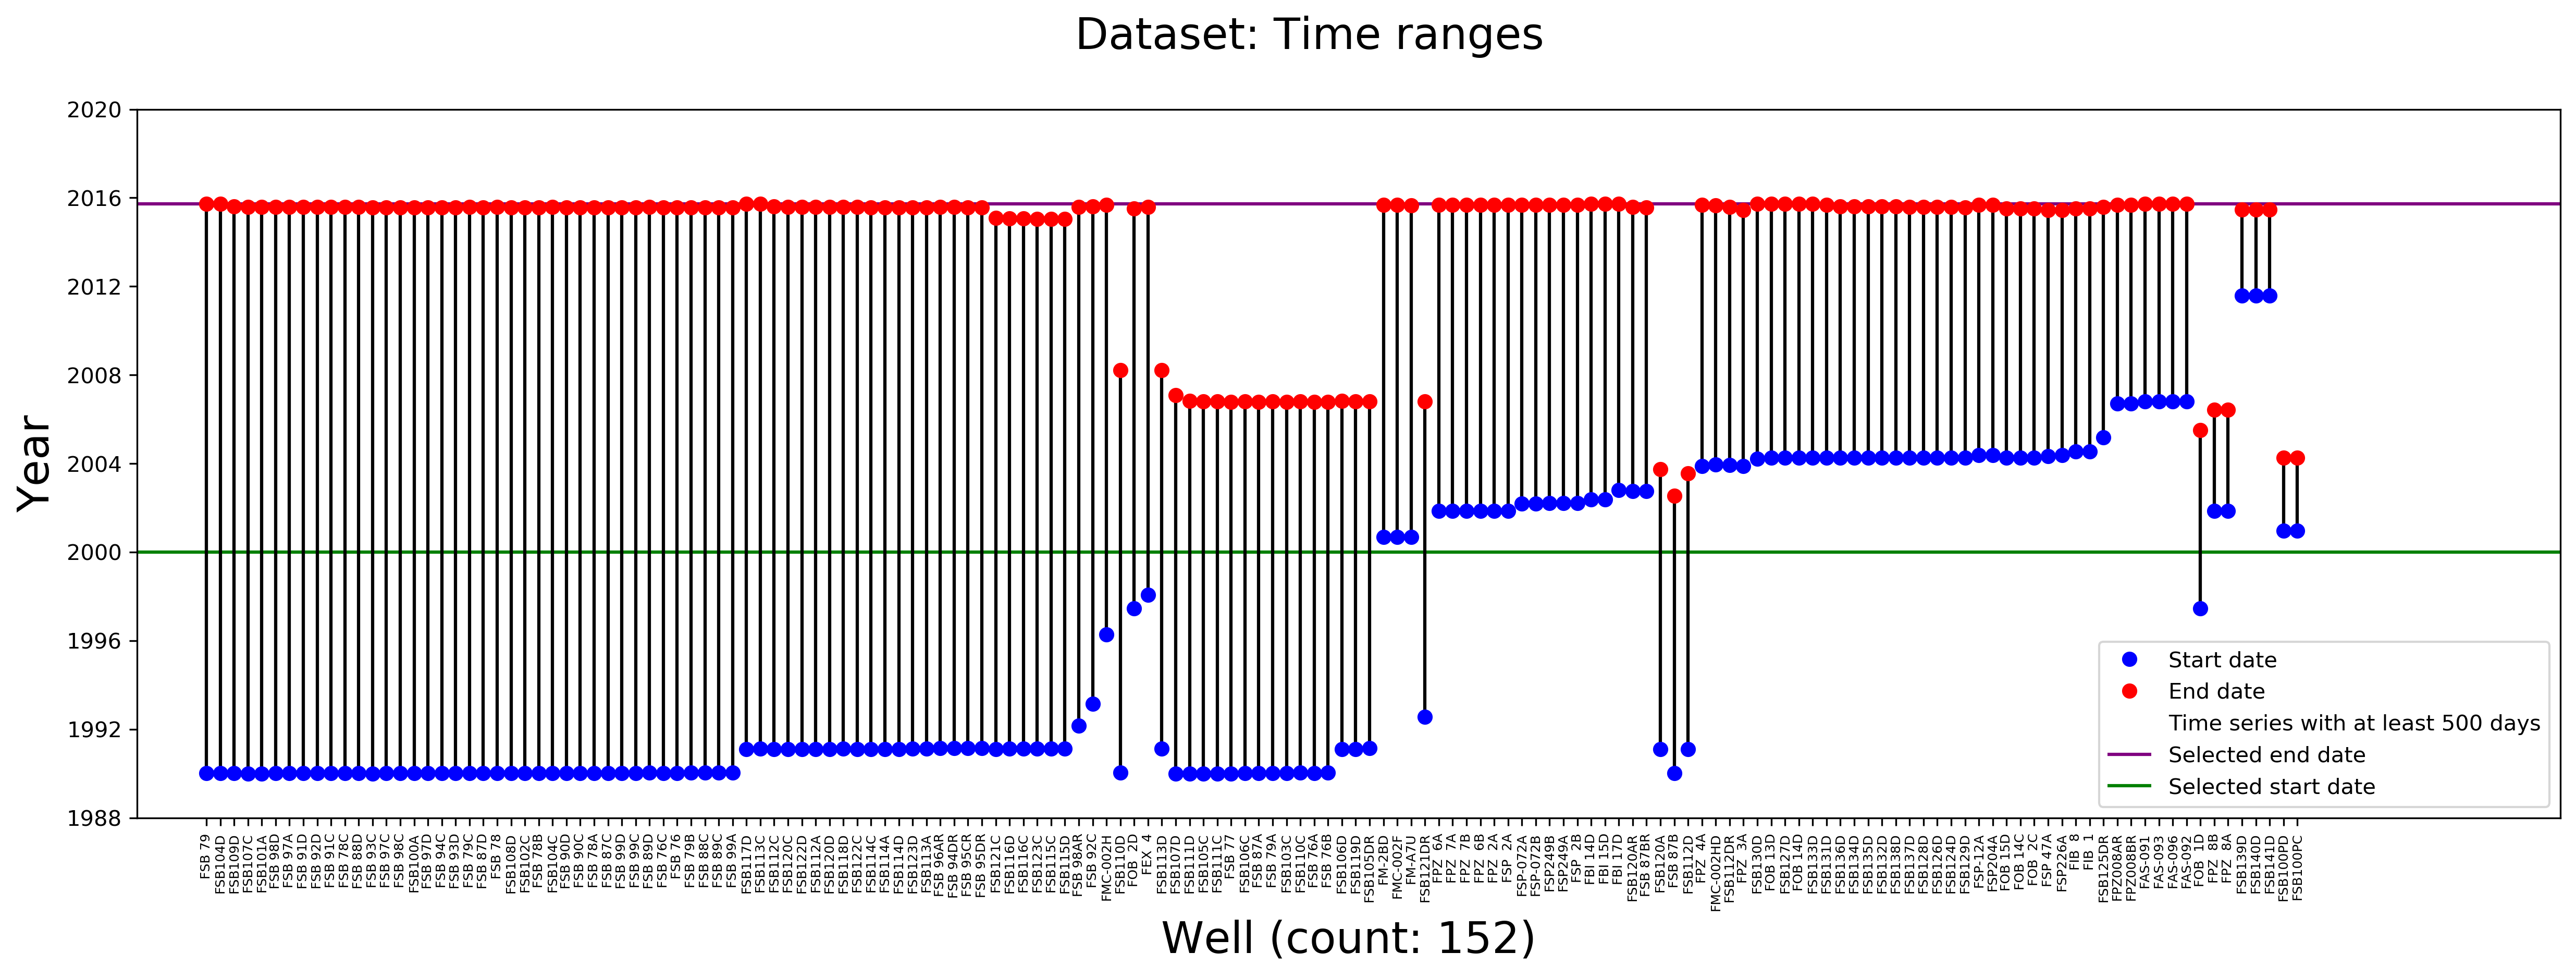

In [24]:
pylenm.plot_all_time_series(start_date='2000-1-1', min_days=500)

,STATION_ID,START_DATE,END_DATE,RANGE
0,FSB 91D,1990-01-06,2015-08-03,9340
1,FSB 92D,1990-01-06,2015-08-03,9340
2,FSB 78C,1990-01-07,2015-08-03,9339
3,FSB 79C,1990-01-09,2015-08-03,9337
4,FSB 79,1990-01-09,2015-08-03,9337
...,...,...,...,...
139,FSB140D,2012-06-05,2013-06-18,378
140,FSB139D,2012-06-05,2013-06-18,378
141,FSP 2C,2002-06-25,2002-09-17,84
142,FOB 1D,2004-04-23,2004-06-22,60


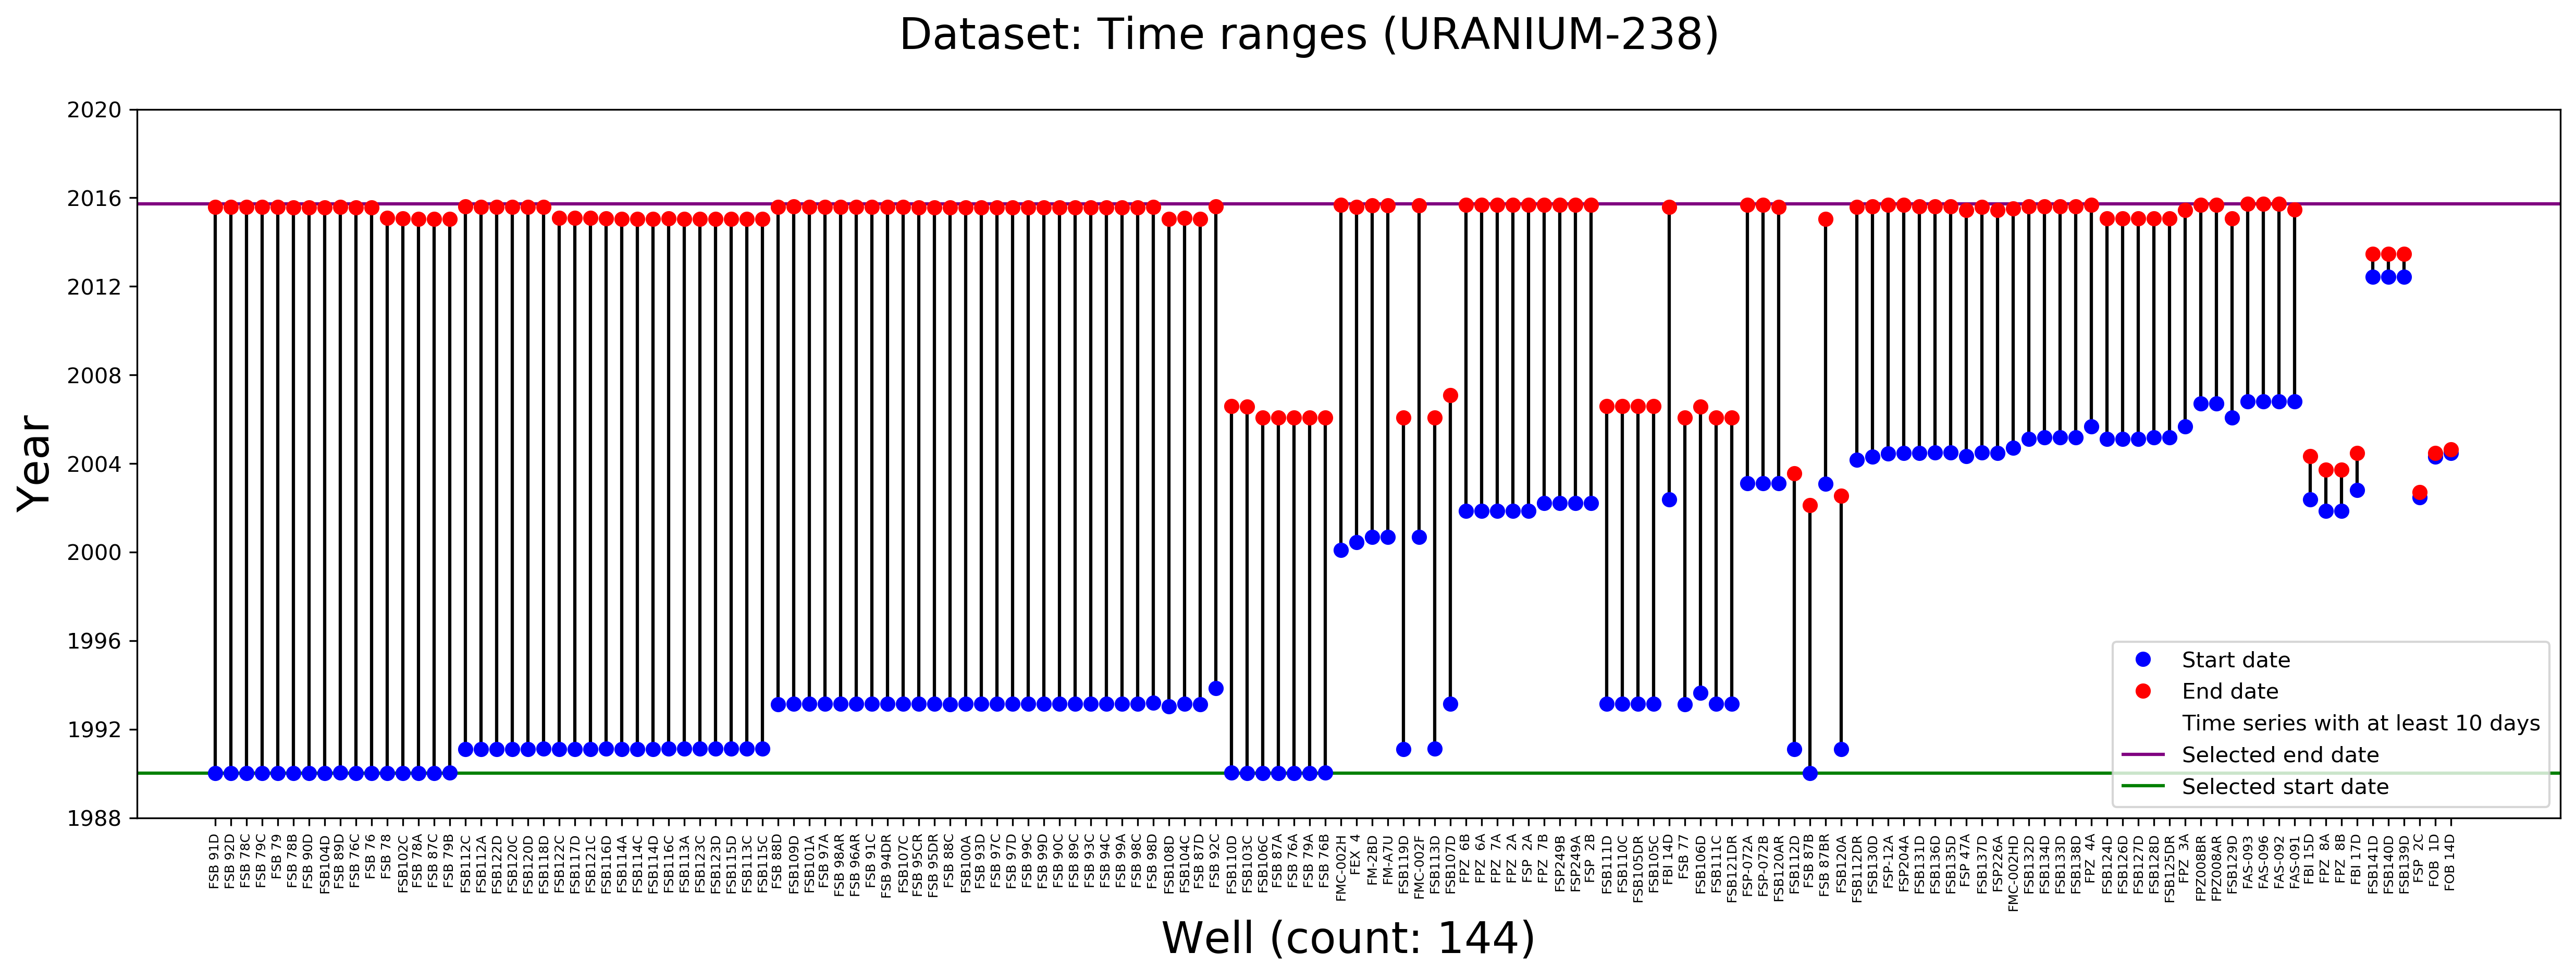

In [25]:
ur = pylenm.plot_all_time_series(analyte_name='URANIUM-238', x_max_lim=150, return_data=True)
ur

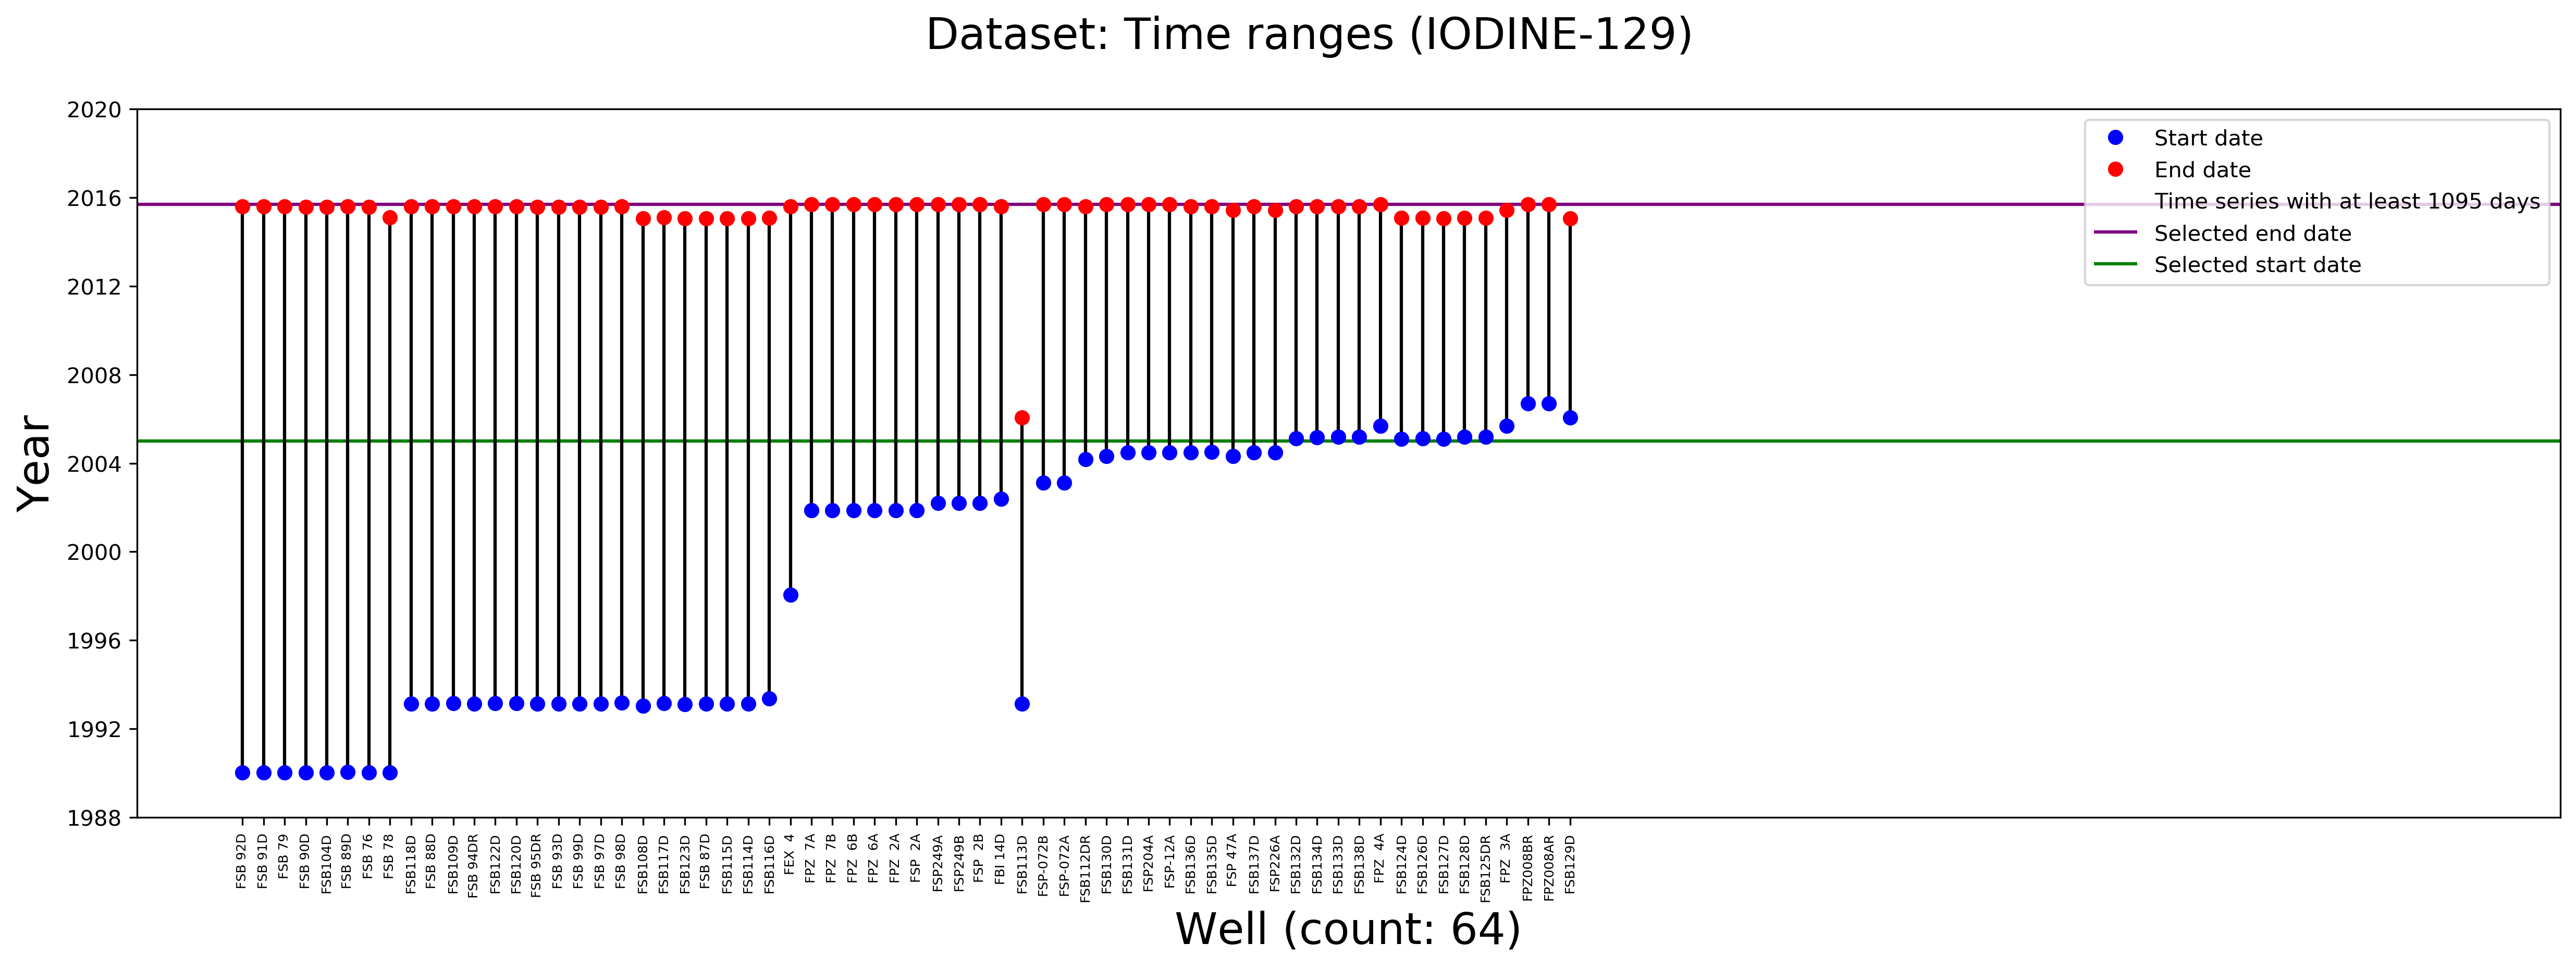

In [26]:
# Added filtering of 'Upper Aquifer' Wells
pylenm.plot_all_time_series(analyte_name='IODINE-129',min_days=3*365, x_max_lim=110, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], start_date='2005-1-1')

In [27]:
usage.get_FunctionDescription('plot_data')


plot_data (well_name, analyte_name, log_transform=True,
     alpha=0, year_interval=2, plot_inline=True, x_label='Years', y_label='', save_dir='plot_data')
Description:
    Plot concentrations over time of a specified well and analyte with a smoothed curve on interpolated data points.
Parameters:
    well_name (string): name of the well to be processed
    analyte_name (string): name of the analyte to be processed
    log_transform (bool): choose whether or not the data should be transformed to log base 10 values
    alpha (int): value between 0 and 10 for line smoothing
    year_interval (int): plot by how many years to appear in the axis e.g.(1 = every year, 5 = every 5 years, ...)
    plot_inline (bool): choose whether or not to show plot inline
    x_label (string): x-axis label
    y_label (string): y-axis label
    save_dir (string): name of the directory you want to save the plot to



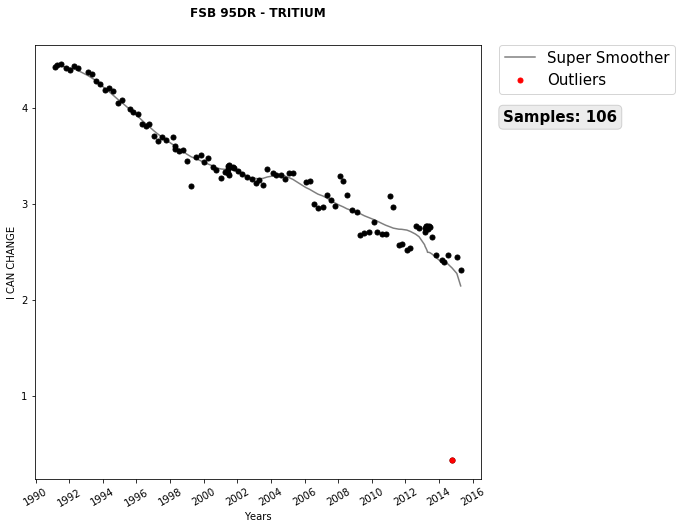

In [28]:
pylenm.plot_data(well_name= 'FSB 95DR', analyte_name='TRITIUM', y_label="I CAN CHANGE")

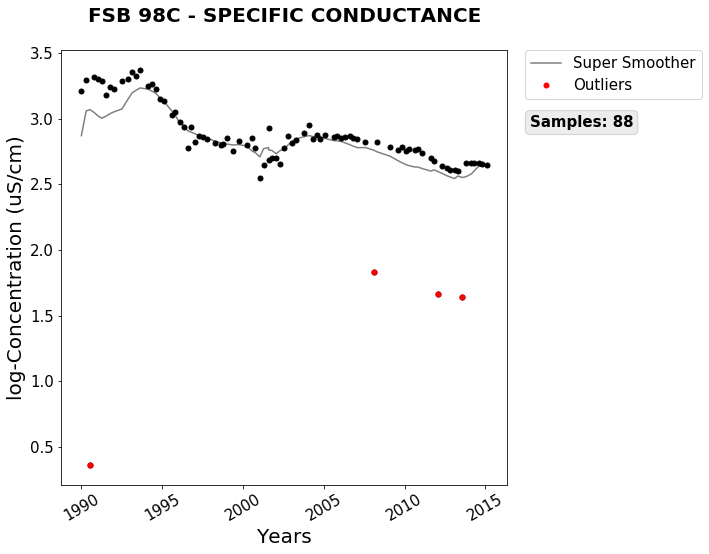

In [29]:
pylenm.plot_data(well_name= 'FSB 98C', analyte_name='SPECIFIC CONDUCTANCE', year_interval=5)

When using the interpolation functionality, a resampling frequency can be specifed. Correct inputs for the the frequency can be found in the function description. 

In [30]:
usage.get_FunctionDescription('interpolate_wells_by_analyte')


interpolate_wells_by_analyte (analyte, frequency='2W', rm_outliers=True, z_threshold=3)
Description: 
    Resamples analyte data based on the frequency specified and interpolates the values in between. 
    NaN values are replaced with the average value per well.
Parameters:
    analyte (string): analyte name for interpolation of all present wells.
    frequency (string): {‘D’, ‘W’, ‘M’, ‘Y’} frequency to interpolate. 
        See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html for valid frequency inputs. 
        (e.g. ‘W’ = every week, ‘D ’= every day, ‘2W’ = every 2 weeks)
    rm_outliers (bool): flag to remove outliers in the data
    z_threshold (int): z_score threshold to eliminate outliers




The `interpolate_wells_by_analyte` function is great as it interpolates and combines all of the wells with the same analyte. There is no need to specify a start and end date as the algorithm will find the optimum start and end date.

In [31]:
wt = pylenm.interpolate_wells_by_analyte(analyte='DEPTH_TO_WATER',
                                         frequency= 'D',
                                         rm_outliers=True,
                                         z_threshold=2.5)
wt

,FSB 99C,FSB128D,FSB125D,FSB120C,FSB 79A,FPZ 6A,FOB 1D,FSB 95DR,FSP 2B,FSB112C,FPZ008AR,FSB 79B,FSB 76A,FSB136D,FSP-072B,FSB 87C,FSB144D,FSB 93C,FPZ 4A,FSB 90D,FSB127D,FSB111D,FSB141D,FSB 96A,FSB 89D,FPZ 8A,FIB 8,FPZ 7A,FSB120AR,FSB108D,FSB113C,FSB102C,FSB 79,FSB121C,FIB 1,FSB 95CR,FSB 91C,FSB 79C,FSB146D,FOB 13D,FSB122C,FOB 2D,FEX 4,FSB 95C,FOB 14D,FSB112A,FSB113D,FSB109D,FSP 2A,FSB137D,FSB145D,FSB 87A,FPZ008BR,FSP249B,FSB116D,FSB 98A,FSB115C,FSB114D,FSB 97A,FSB107D,FPZ 3A,FSB 87D,FSB110D,FSB113A,FSB124D,FSP-072A,FSB116C,FSB142D,FSB112D,FSB 88C,FSB 91D,FSP249A,FSB140D,FSB100A,FBI 14D,FSB107C,FPZ 7B,FSB139D,FSB 78C,FSB131D,FSB 98D,FSB114C,FOB 2C,FSB 95D,FSB120A,FSB125DR,FSB 89C,FSB133D,FSP-12A,FPZ 8B,FSB 99D,FSB 78A,FSB 87B,FSB123C,FSB135D,FSB 92D,FSB 78B,FSB119D,FSB111C,FSB123D,FSB104C,FSB130D,FSB101A,FSP 47A,FSB106D,FSB 93D,FSB 96AR,FSB100PD,FSB 76,FBI 17D,FSB 94DR,FSB114A,FSB 98AR,FSB 94C,FSB 76B,FSB110C,FSB112DR,FSB105C,FSB 97C,FSB105D,FSB105DR,FSB 99A,FSP226A,FSB115D,FSB106C,FSB 90C,FSB143D,FSP204A,FSB138D,FOB 15D,FSB 78,FSB100PC,FSB103C,FPZ 2A,FBI 15D,FSB126D,FOB 14C,FSB120D,FSB 87BR,FSB 76C,FSB129D,FSB 98C,FSB134D,FSB 94D,FSB118D,FSB 77,FSB 88D,FSB 92C,FSB 97D,FSB121DR,FSB117D,FSB104D,FSB132D,FSB122D,FPZ 6B
2003-11-18,79.256364,47.045256,34.878703,76.201852,61.134545,3.800000,22.335055,76.220000,6.950000,31.247073,3.46848,60.972727,139.570000,17.592556,3.33000,79.752247,27.40163,69.222667,8.200000,64.122414,15.851624,61.378571,22.19187,128.350000,65.790909,1.900279,22.31104,4.600000,132.617778,81.730370,22.193247,7.149351,20.057303,55.408537,24.859586,78.460000,69.190000,23.935506,26.650759,18.594071,21.879630,25.547867,28.77509,79.370000,15.922082,76.898148,17.418831,79.813333,6.350000,8.582177,27.769418,134.830899,3.520985,3.550000,11.955579,131.630000,23.501053,36.099259,134.918182,57.458537,10.600000,75.616854,32.946296,65.431169,54.46826,4.010936,13.566211,30.7225,28.850000,71.556364,66.047753,3.900000,22.732563,135.470000,22.280040,61.540000,3.500000,19.614944,68.410000,26.860232,73.612857,40.203704,29.637708,68.200000,132.700000,38.890364,69.883596,18.167834,5.171534,1.94992,74.590909,117.347333,139.220000,29.157143,21.434996,64.672727,119.292418,48.162439,65.369268,27.101429,21.241429,31.885582,134.419091,4.508915,30.550182,67.020779,129.186292,48.925000,77.385165,24.470516,72.920000,97.627037,133.485333,74.685714,143.340667,35.480000,26.669754,80.128049,79.350602,78.410000,76.600000,138.009091,5.03236,17.512000,35.896296,68.502247,30.094112,5.384739,10.879913,22.763149,65.784667,35.910000,42.617143,6.500000,12.984347,35.672092,23.352564,73.751852,139.040225,81.657333,28.704738,76.874096,20.496982,68.200000,32.926753,61.059551,66.281818,67.300602,76.669277,51.758049,29.016883,19.777778,19.281159,18.296296,3.400000
2003-11-19,79.269773,47.045256,34.878703,76.204938,61.135909,3.775926,22.335587,76.227500,6.931481,31.239634,3.46848,60.973295,139.571667,17.592556,3.33000,79.773034,27.40163,69.220111,8.190741,64.156322,15.851624,61.402976,22.19187,128.350000,65.818182,1.900279,22.31104,4.590714,132.617407,81.744321,22.189221,7.144156,20.012360,55.407317,24.859586,78.465833,69.203750,23.913933,26.650759,18.594071,21.879012,25.543009,28.77509,79.370000,15.922082,76.895062,17.419481,79.842222,6.345000,8.582177,27.769418,134.829213,3.520985,3.542857,11.954421,131.630000,23.498947,36.118025,134.913636,57.482317,10.587037,75.647753,32.923457,65.430519,54.46826,4.010614,13.563789,30.7225,28.850000,71.569773,66.076966,3.891071,22.732563,135.467500,22.268978,61.551667,3.500000,19.614944,68.390000,26.860232,73.634048,40.209877,29.637708,68.200000,132.700000,38.890364,69.906854,18.167834,5.171534,1.94992,74.630682,117.343222,139.220000,29.164286,21.434996,64.692045,119.289451,48.162805,65.378659,27.112857,21.231190,31.885582,134.415568,4.508915,30.542774,67.037013,129.184494,48.911979,77.401099,24.446839,72.930000,97.625432,133.483556,74.696429,143.338778,35.470000,26.669754,80.134756,79.362048,78.410000,76.612500,138.006818,5.

Let's look at the difference between removing the outliers and keeping them.

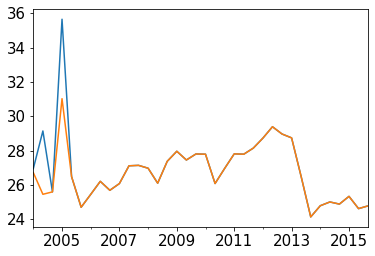

In [32]:
freq = '4M'
analyte = 'DEPTH_TO_WATER'

wt_with_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                       frequency = freq,
                                                       rm_outliers=False)

wt_without_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                          frequency = freq,
                                                          rm_outliers=True,
                                                          z_threshold=1.5)

wt_with_outliers['FSB131D'].plot()
wt_without_outliers['FSB131D'].plot()

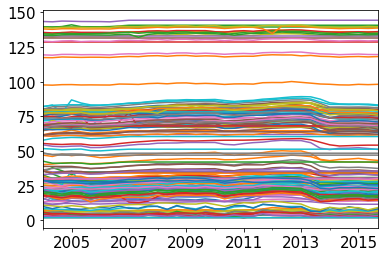

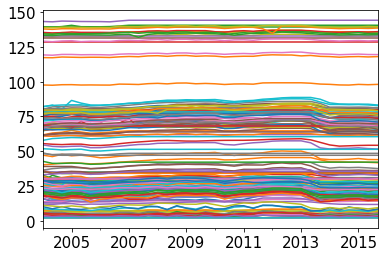

In [33]:
wt_with_outliers.plot(legend=None)
wt_without_outliers.plot(legend=None)

The `interpolate_well_data` function is useful if you are only looking at one well at a time. But has limited functionality as it can only take in **ONE** well as a parameter. 

In [34]:
pylenm.interpolate_well_data(well_name='FSB 95DR',
                             analytes=['DEPTH_TO_WATER', 'URANIUM-238'],
                             frequency='2M')

,DEPTH_TO_WATER,URANIUM-238
COLLECTION_DATE,,
1993-02-28,73.030,1620.000000
1993-04-30,72.120,1475.000000
1993-06-30,71.325,1330.000000
1993-08-31,71.940,1100.000000
1993-10-31,72.540,1155.000000
...,...,...
2014-12-31,75.375,239.666667
2015-02-28,75.610,232.000000
2015-04-30,75.000,224.333333
